#Data-Science Internship @ Piano For AI: MIDI Analytics
>This project will cover the 3 question for this internship role

>Import required modules and libraries

In [1]:
import datasets
import pandas as pd
import matplotlib.pyplot as plt

/home/erick/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


>Load the dataset to be used in the project

In [2]:
from datasets import load_dataset

dataset = load_dataset("roszcz/internship-midi-data-science", split="train")

Found cached dataset parquet (/home/erick/.cache/huggingface/datasets/roszcz___parquet/roszcz--internship-midi-data-science-5506ea35081b41a4/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


>Get some insight from the given dataset

>understand the structure of the dataset

In [3]:
record = dataset[0]
df = pd.DataFrame(record["notes"])
print(df.head())

        end  pitch     start  velocity
0  2.058438     42  1.934219        74
1  2.990469     66  1.935573        84
2  2.044531     30  1.948229        76
3  2.613073     49  2.556146        77
4  2.618333     54  2.564844        59


For a given record, create a chart of time vs. speed

>Time_interval will be computed as df['end']-df['start']

>speed, the note per second can be computed as 1/time_interval

>incase the time exceed 120 second we will convert it into minutes

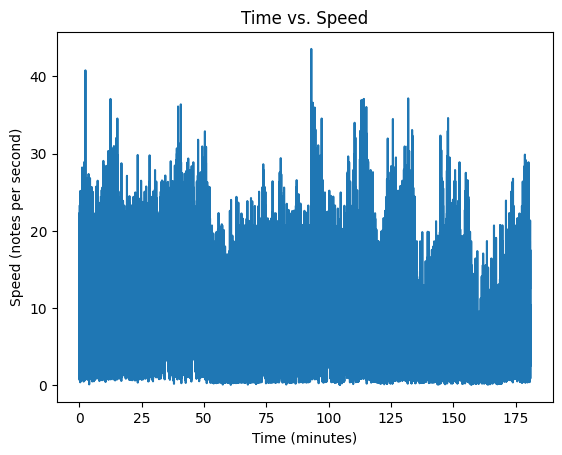

In [4]:
time_intervals = df['end'] - df['start']
speed = 1 / time_intervals
if df['end'].max() > 120:
    df['start'] /= 60
    df['end'] /= 60
    time_unit = "minutes"
else:
    time_unit = "seconds"


plt.plot(df['start'], speed)
plt.xlabel(f"Time ({time_unit})")
plt.ylabel("Speed (notes per second)")
plt.title("Time vs. Speed")
plt.show()

#Create a chart showing the number of notes pressed at the same time. Experiment with different thresholds
>Define list of chords time window , example 2,4,8,12

>Calculate and plot the number  of chords in each time window

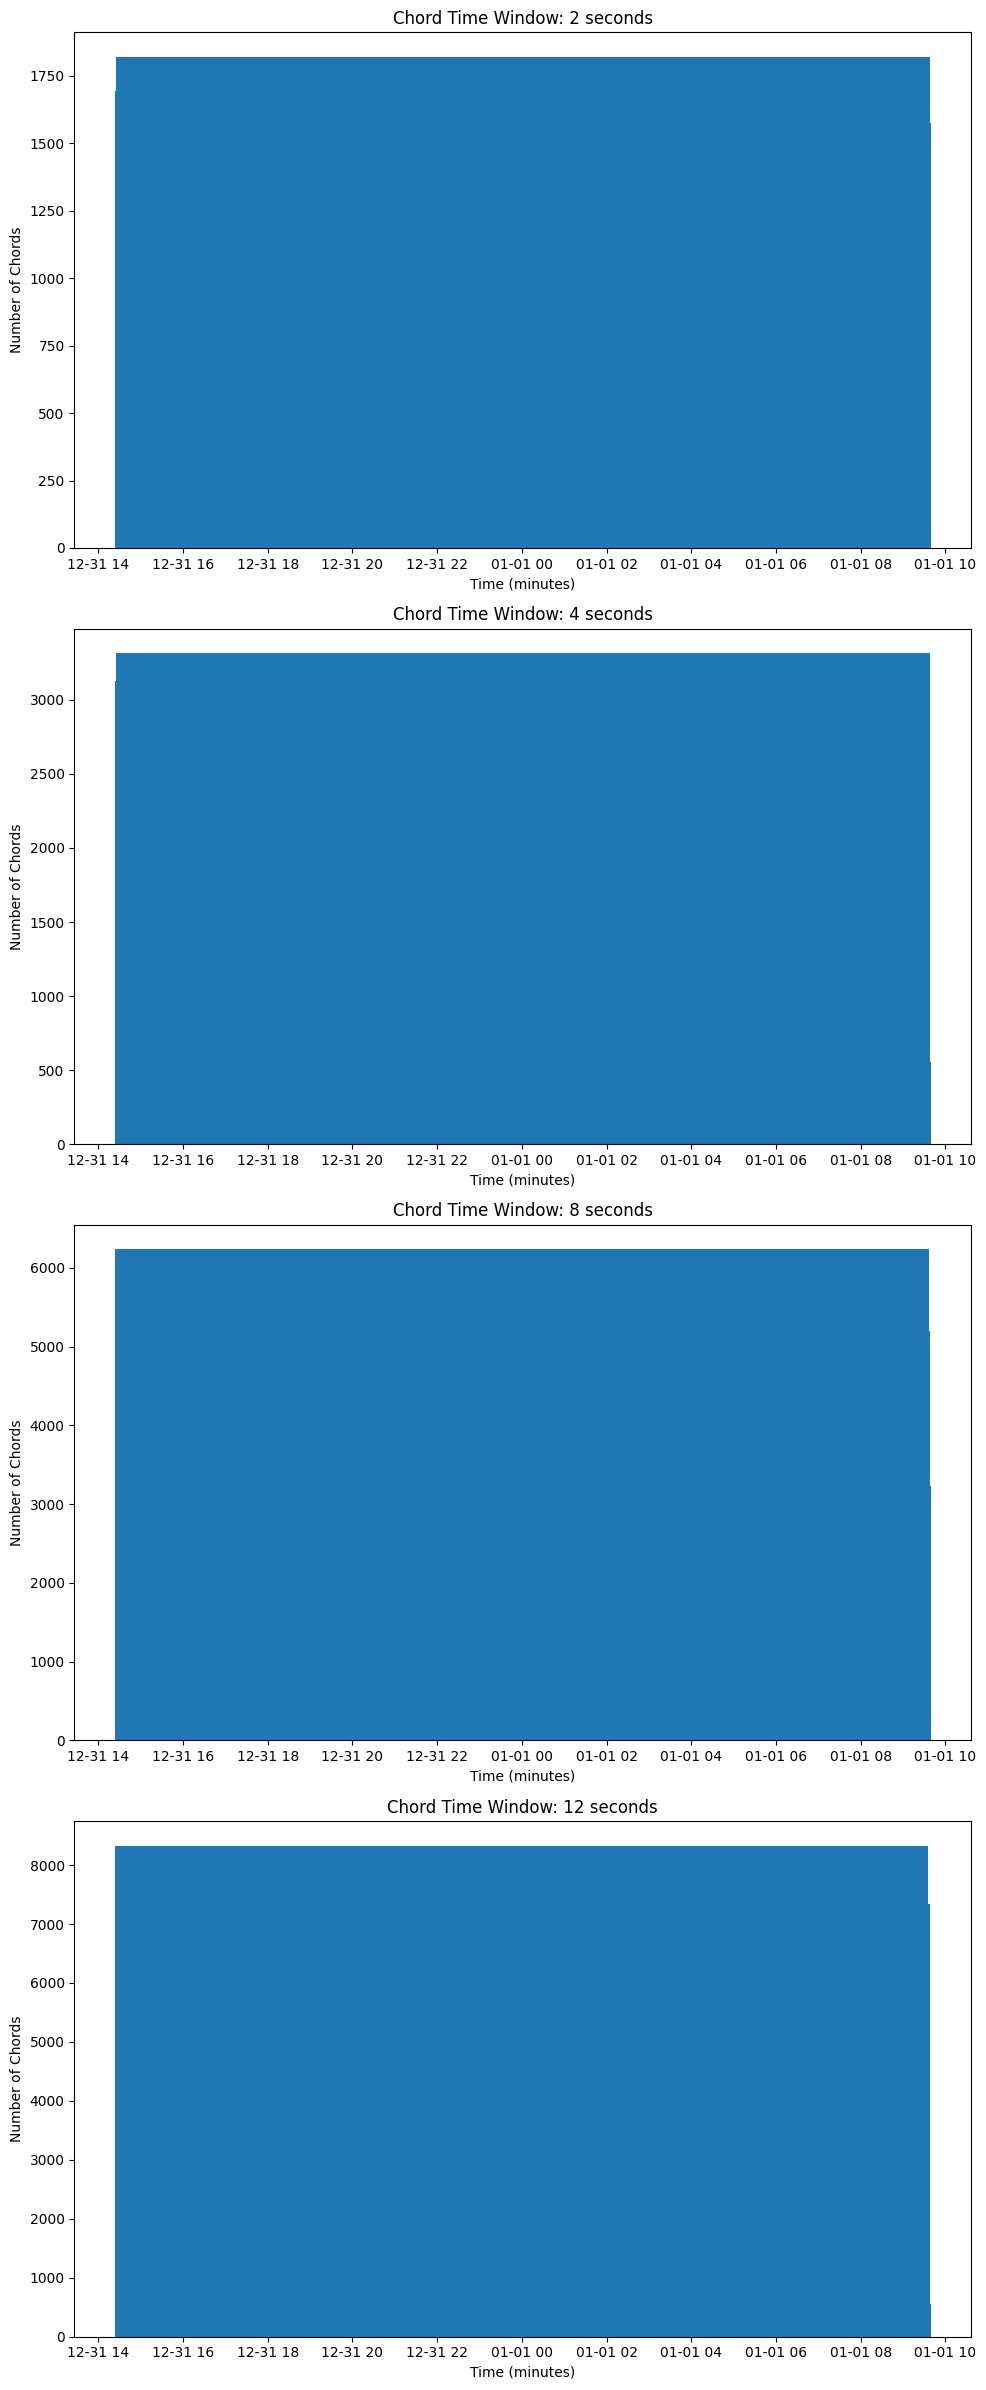

In [5]:
chord_time_windows = [2, 4, 8, 12]

df_temp = df.copy()
df_temp.index = pd.to_datetime(df_temp['start'], unit='s')

num_rows = len(chord_time_windows)
fig, axs = plt.subplots(num_rows, 1, figsize=(10, 6 * num_rows))
for i, chord_time_window in enumerate(chord_time_windows):
    chord_time_window_td = pd.Timedelta(seconds=chord_time_window)
    chords = df_temp.groupby(pd.Grouper(freq=chord_time_window_td)).size()
    axs[i].bar(chords.index, chords.values)
    axs[i].set_xlabel(f"Time ({time_unit})")
    axs[i].set_ylabel("Number of Chords")
    axs[i].set_title(f"Chord Time Window: {chord_time_window} seconds")

plt.tight_layout()
plt.show()

#For a given record, create a chart of time vs. the number of chords played

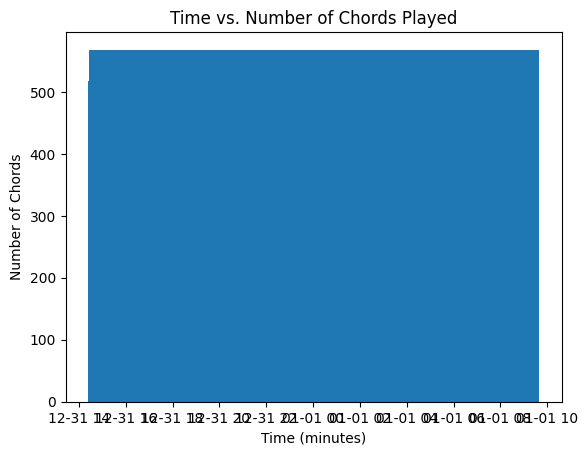

In [6]:
chord_time_window = 0.5
df_temp = df.copy()
df_temp.index = pd.to_datetime(df_temp['start'], unit='s')
chord_time_window_td = pd.Timedelta(seconds=chord_time_window)
chords = df_temp.groupby(pd.Grouper(freq=chord_time_window_td)).size()


plt.bar(chords.index, chords.values)
plt.xlabel(f"Time ({time_unit})")
plt.ylabel("Number of Chords")
plt.title("Time vs. Number of Chords Played")
plt.show()